In [17]:
import os
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.io as pio
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker


# Construct the relative file path
file_path = os.path.join('..', '..', 'Output', 'Simulation', 'quadcopterFeasability.csv')
data = pd.read_csv(file_path)


View data

In [18]:
data

,subplots,mean_n,area,trueDensity,CV,NSubplots,Abundance,Overlap,area_p
0,16.0,14.0,128.0,109.375,0.087,16,10,0,0.22
1,16.0,27.0,128.0,218.750,0.066,16,20,0,0.22
2,16.0,43.0,128.0,343.750,0.045,16,30,0,0.22
3,16.0,61.0,128.0,484.375,0.035,16,40,0,0.22
4,16.0,6.0,128.0,46.875,0.241,16,5,0,0.22
...,...,...,...,...,...,...,...,...,...
95,9.0,3.0,36.0,111.111,1.440,9,10,gimbal,0.06
96,9.0,6.0,36.0,250.000,0.968,9,20,gimbal,0.06
97,9.0,13.0,36.0,527.778,0.647,9,30,gimbal,0.06
98,9.0,12.0,36.0,500.000,0.648,9,40,gimbal,0.06


In [20]:

# Define a mapping from unique entries to values
mapping = {
    65: 1,
    '65': 1,
    10: 2,
    '10': 2,
    0: 3,
    '0': 3,
    200: 4,
    '200': 4,
    'gimbal': 5
}

# Assign categorical values based on the mapping
data['Overlap_cat'] = data['Overlap'].map(mapping)

print(data)

    subplots  mean_n   area  trueDensity     CV  NSubplots  Abundance Overlap  \
0       16.0    14.0  128.0      109.375  0.087         16         10       0   
1       16.0    27.0  128.0      218.750  0.066         16         20       0   
2       16.0    43.0  128.0      343.750  0.045         16         30       0   
3       16.0    61.0  128.0      484.375  0.035         16         40       0   
4       16.0     6.0  128.0       46.875  0.241         16          5       0   
..       ...     ...    ...          ...    ...        ...        ...     ...   
95       9.0     3.0   36.0      111.111  1.440          9         10  gimbal   
96       9.0     6.0   36.0      250.000  0.968          9         20  gimbal   
97       9.0    13.0   36.0      527.778  0.647          9         30  gimbal   
98       9.0    12.0   36.0      500.000  0.648          9         40  gimbal   
99       9.0     2.0   36.0       55.556  1.411          9          5  gimbal   

    area_p  Overlap_cat  
0

C:\Users\lhambrec\AppData\Local\Temp\ipykernel_8684\2305633602.py:26: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  sc_x = ax.scatter(


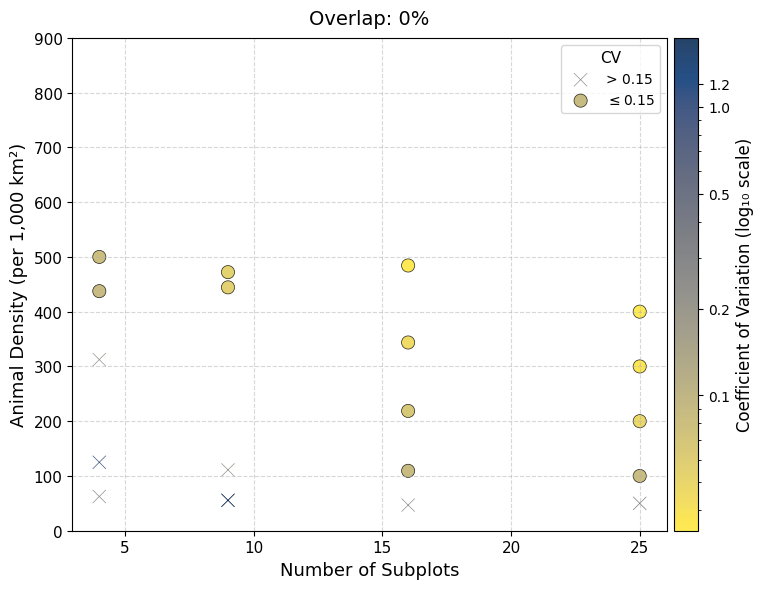

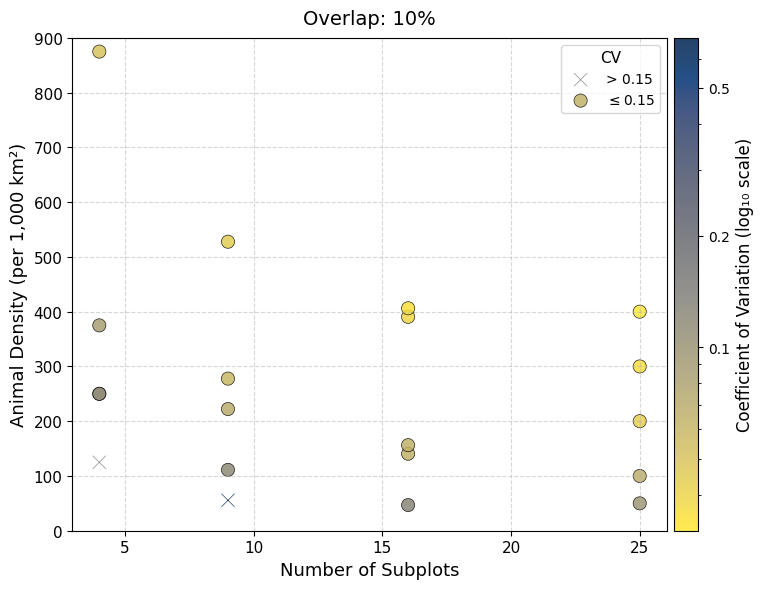

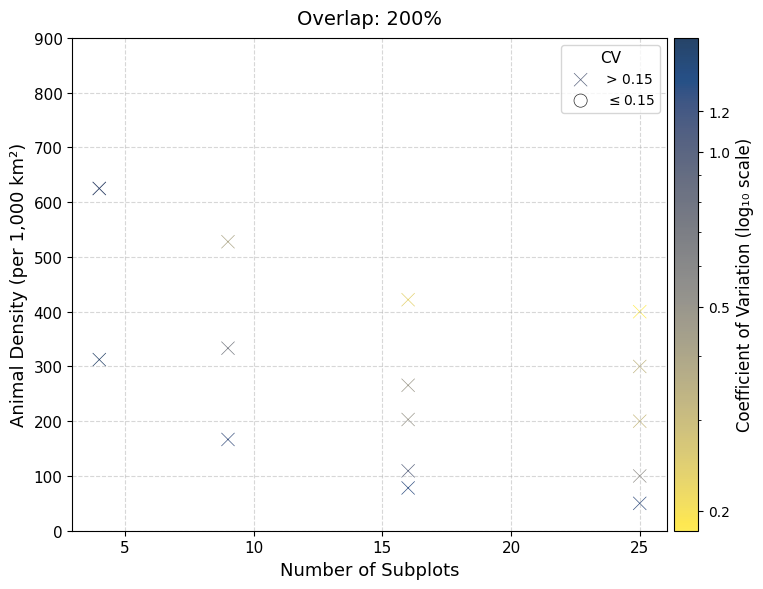

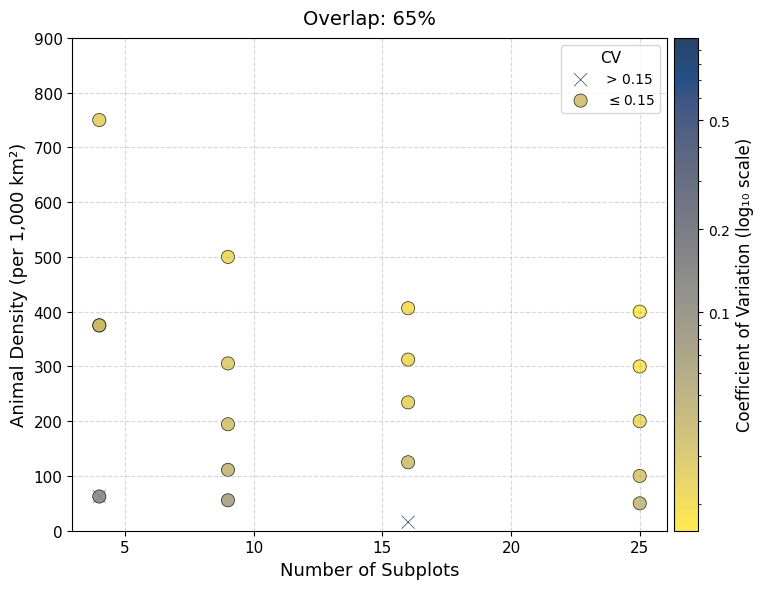

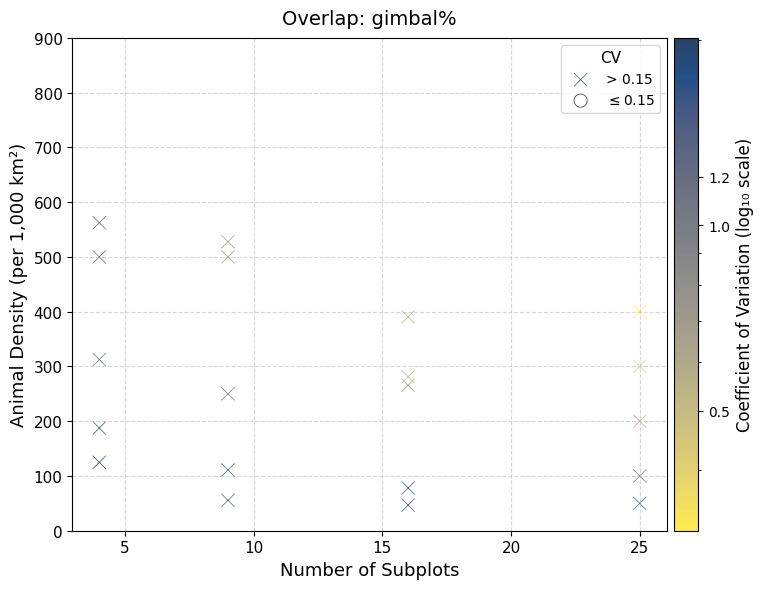

In [28]:
# Get unique overlap values
overlap_values = data['Overlap'].unique()

# Create a figure for each overlap value
for overlap in overlap_values:
    # Filter data for current overlap
    overlap_data = data[data['Overlap'] == overlap]
    
    fig, ax = plt.subplots(figsize=(8, 6))

    # Masks for CV groups
    mask_x = overlap_data['CV'] > 0.15
    mask_circle = overlap_data['CV'] <= 0.15

    # Use a colorblind-friendly colormap
    cmap = plt.get_cmap('cividis_r')
    norm = mpl.colors.LogNorm(vmin=overlap_data['CV'].min()+1e-6, vmax=overlap_data['CV'].max())

    # Format x-axis ticks as integers
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x)}"))
    ax.set_xlabel("Number of Subplots", fontsize=13)
    # ax.annotate('%', xy=(0.96, -0.015), xycoords='axes fraction',
        # fontsize=12, ha='left', va='top')

    # Plot each group with different marker
    sc_x = ax.scatter(
        overlap_data.loc[mask_x, 'NSubplots'],
        overlap_data.loc[mask_x, 'trueDensity'],
        c=overlap_data.loc[mask_x, 'CV'],
        cmap=cmap,
        norm=norm,
        marker='x',
        s=90,
        alpha=0.85,
        edgecolor='k',
        linewidth=0.5,
        label='> 0.15'
    )
    sc_circle = ax.scatter(
        overlap_data.loc[mask_circle, 'NSubplots'],
        overlap_data.loc[mask_circle, 'trueDensity'],
        c=overlap_data.loc[mask_circle, 'CV'],
        cmap=cmap,
        norm=norm,
        marker='o',
        s=90,
        alpha=0.85,
        edgecolor='k',
        linewidth=0.5,
        label=r'$\leq 0.15$'
    )

    # Labels and formatting
    ax.set_ylabel('Animal Density (per 1,000 km²)', fontsize=13)
    ax.tick_params(axis='both', which='major', labelsize=11)
    ax.grid(True, linestyle='--', alpha=0.5)
    
    # Set y-axis limits
    ax.set_ylim(0, 900)  # Set the y-axis range from 0 to 900
    
    # Add title showing overlap value
    ax.set_title(f'Overlap: {overlap}%', fontsize=14, pad=10)

    # Colorbar
    ticks = [0.1, 0.2, 0.5, 1.0, 1.2]
    ticks = [t for t in ticks if overlap_data['CV'].min() <= t <= overlap_data['CV'].max()]
    cbar = fig.colorbar(sc_circle, ax=ax, ticks=ticks, pad=0.01)
    cbar.set_label('Coefficient of Variation (log₁₀ scale)', fontsize=12)
    cbar.ax.tick_params(labelsize=10)
    cbar.ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
    cbar.ax.yaxis.set_minor_formatter(ticker.NullFormatter())

    ax.legend(title='CV', fontsize=10, title_fontsize=11)

    plt.tight_layout()
    
    # Save each figure with overlap value in filename
    plt.savefig(os.path.join('..', '..', 'Output', 'Plots', f'quadcopterFeasability_plot_2D_CV_overlap{overlap}.png'), dpi=300)
    plt.show()

C:\Users\lhambrec\AppData\Local\Temp\ipykernel_8684\116555113.py:33: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  sc_x = ax.scatter(


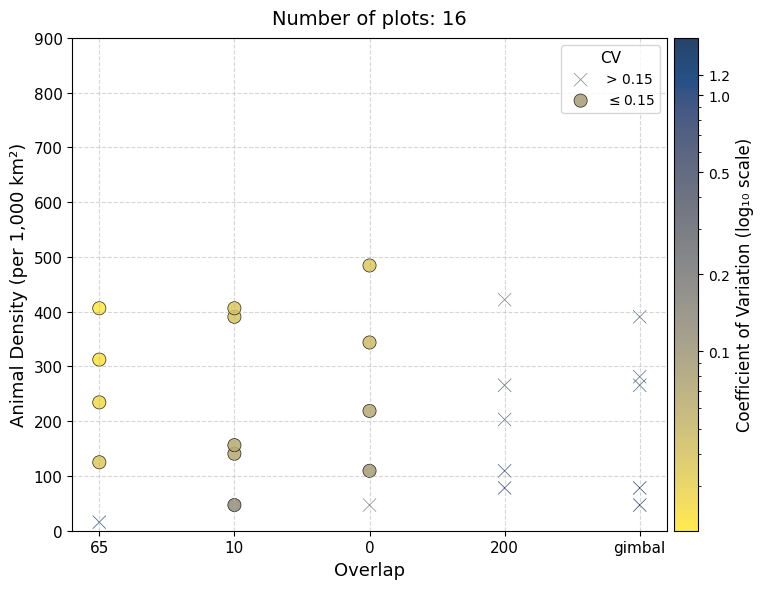

C:\Users\lhambrec\AppData\Local\Temp\ipykernel_8684\116555113.py:33: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  sc_x = ax.scatter(


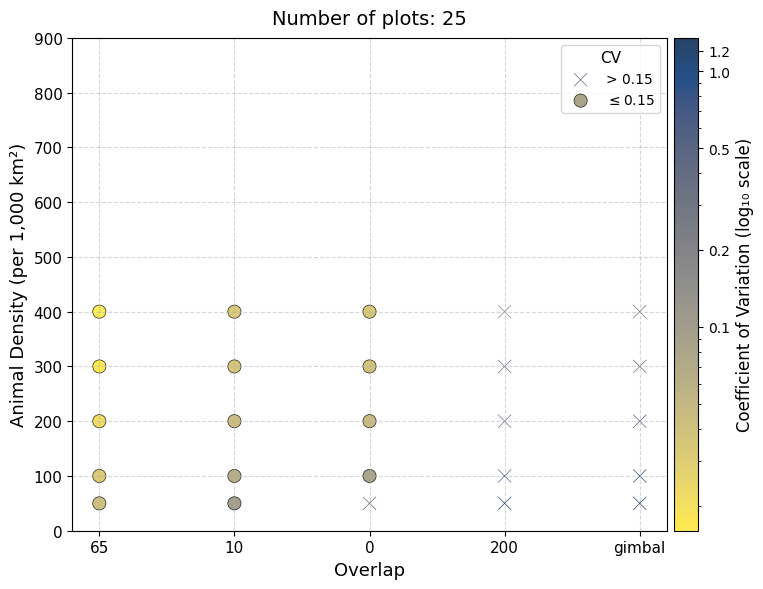

C:\Users\lhambrec\AppData\Local\Temp\ipykernel_8684\116555113.py:33: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  sc_x = ax.scatter(


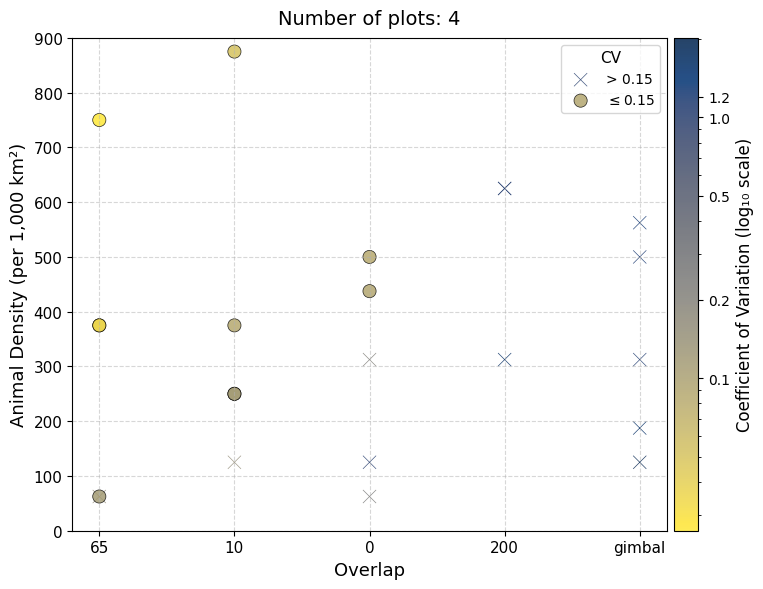

C:\Users\lhambrec\AppData\Local\Temp\ipykernel_8684\116555113.py:33: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  sc_x = ax.scatter(


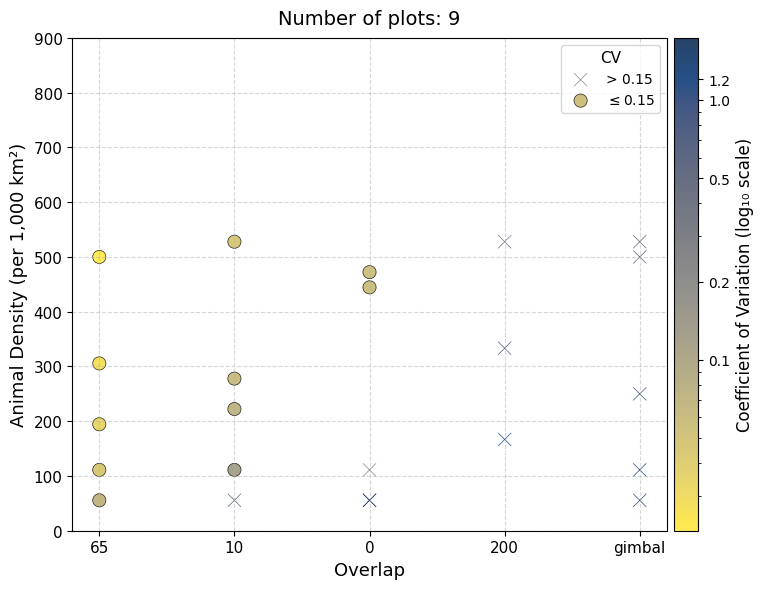

In [29]:
# Get unique overlap values
overlap_values = data['NSubplots'].unique()
label_mapping = {
    1: '65',
    2: '10',
    3: '0',
    4: '200',
    5: 'gimbal'
}

# Create a figure for each overlap value
for overlap in overlap_values:
    # Filter data for current overlap
    overlap_data = data[data['NSubplots'] == overlap]
    
    fig, ax = plt.subplots(figsize=(8, 6))

    # Masks for CV groups
    mask_x = overlap_data['CV'] > 0.15
    mask_circle = overlap_data['CV'] <= 0.15

    # Use a colorblind-friendly colormap
    cmap = plt.get_cmap('cividis_r')
    norm = mpl.colors.LogNorm(vmin=overlap_data['CV'].min()+1e-6, vmax=overlap_data['CV'].max())

    # Format x-axis ticks as integers
    # ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x)}"))
    ax.set_xlabel("Overlap", fontsize=13)
    # ax.annotate('%', xy=(0.96, -0.015), xycoords='axes fraction',
        # fontsize=12, ha='left', va='top')

    # Plot each group with different marker
    sc_x = ax.scatter(
        overlap_data.loc[mask_x, 'Overlap_cat'],
        overlap_data.loc[mask_x, 'trueDensity'],
        c=overlap_data.loc[mask_x, 'CV'],
        cmap=cmap,
        norm=norm,
        marker='x',
        s=90,
        alpha=0.85,
        edgecolor='k',
        linewidth=0.5,
        label='> 0.15'
    )
    sc_circle = ax.scatter(
        overlap_data.loc[mask_circle, 'Overlap_cat'],
        overlap_data.loc[mask_circle, 'trueDensity'],
        c=overlap_data.loc[mask_circle, 'CV'],
        cmap=cmap,
        norm=norm,
        marker='o',
        s=90,
        alpha=0.85,
        edgecolor='k',
        linewidth=0.5,
        label=r'$\leq 0.15$'
    )

    # Labels and formatting
    ax.set_ylabel('Animal Density (per 1,000 km²)', fontsize=13)
    ax.tick_params(axis='both', which='major', labelsize=11)
    ax.grid(True, linestyle='--', alpha=0.5)

    # Set y-axis limits
    ax.set_ylim(0, 900)  # Set the y-axis range from 0 to 900
    
    # Add title showing overlap value
    ax.set_title(f'Number of plots: {overlap}', fontsize=14, pad=10)

    # Custom x-tick labels
    unique_overlap_cats = overlap_data['Overlap_cat'].unique()
    ax.set_xticks(unique_overlap_cats)  # Set the x-ticks to the unique values
    ax.set_xticklabels([label_mapping[cat] for cat in unique_overlap_cats])  # Set custom labels

    # Colorbar
    ticks = [0.1, 0.2, 0.5, 1.0, 1.2]
    ticks = [t for t in ticks if overlap_data['CV'].min() <= t <= overlap_data['CV'].max()]
    cbar = fig.colorbar(sc_circle, ax=ax, ticks=ticks, pad=0.01)
    cbar.set_label('Coefficient of Variation (log₁₀ scale)', fontsize=12)
    cbar.ax.tick_params(labelsize=10)
    cbar.ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
    cbar.ax.yaxis.set_minor_formatter(ticker.NullFormatter())

    ax.legend(title='CV', fontsize=10, title_fontsize=11)

    plt.tight_layout()
    
    # Save each figure with overlap value in filename
    plt.savefig(os.path.join('..', '..', 'Output', 'Plots', f'quadcopterFeasability_plot_2D_CV_overlap{overlap}.png'), dpi=300)
    plt.show()